# FINAL SCRIPT

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from pathlib import Path
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import set_config 

from time import process_time
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

In [92]:
df=pd.read_csv('./2022_AIS_merged_ALLCSV.csv').drop(['Unnamed: 0'], axis=1, errors='ignore')
df

BaseDateTime       LAT       LON  SOG   COG  Heading  \
0       2022-01-15 07:25:25  47.13891 -91.11550  7.7  71.0     69.0   
1       2022-01-15 07:27:45  47.14072 -91.10834  8.1  70.1     69.0   
2       2022-01-15 07:23:05  47.13720 -91.12231  7.3  71.2     69.0   
3       2022-01-15 07:26:35  47.13980 -91.11195  7.9  70.5     69.0   
4       2022-01-15 07:30:04  47.14257 -91.10111  8.0  70.1     69.0   
...                     ...       ...       ...  ...   ...      ...   
192430  2022-01-15 06:05:54  47.08739 -91.32984  8.0  71.5     69.0   
192431  2022-01-15 07:20:45  47.13567 -91.12878  7.1  72.4     69.0   
192432  2022-01-15 07:21:54  47.13642 -91.12557  7.1  72.1     69.0   
192433  2022-01-15 07:19:34  47.13495 -91.13200  7.1  73.9     70.0   
192434  2022-01-15 07:14:45  47.13205 -91.14533  7.1  71.0     71.0   

               IMO  VesselType  Status  Length  ...  siconc  bottomT  usi  \
0       IMO7514701        70.0     8.0   304.0  ...     NaN      NaN  NaN   
1       IMO7514701        70.0     8.0   304.0  ...     NaN      NaN  NaN   
2       IMO7514701        70.0     8.0   304.0  ...     NaN      NaN  NaN   
3       IMO7514701        70.0     8.0   304.0  ...     NaN      NaN  NaN   
4       IMO7514701        70.0     8.0   304.0  ...     NaN      NaN  NaN   
...            ...         ...     ...     ...  ...     ...      ...  ...   
192430  IMO7514701        70.0     8.0   304.0  ...     NaN      NaN  NaN   
192431  IMO7514701        70.0     8.0   304.0  ...     NaN      NaN  NaN   
192432  IMO7514701        70.0     8.0   304.0  ...     NaN      NaN  NaN   
192433  IMO7514701        70.0     8.0   304.0  ...     NaN      NaN  NaN   
192434  IMO7514701        70.0     8.0   304.0  ...     NaN      NaN  NaN   

        sithick  vsi  zos  thetao  so  vo  uo  
0           NaN  NaN  NaN     NaN NaN NaN NaN  
1           NaN  NaN  NaN     NaN NaN NaN NaN  
2           NaN  NaN  NaN     NaN NaN NaN NaN  
3           NaN  NaN  NaN     NaN NaN NaN NaN  
4           NaN  NaN  NaN     NaN NaN NaN NaN  
...         ...  ...  ...     ...  ..  ..  ..  
192430      NaN  NaN  NaN     NaN NaN NaN NaN  
192431      NaN  NaN  NaN     NaN NaN NaN NaN  
192432      NaN  NaN  NaN     NaN NaN NaN NaN  
192433      NaN  NaN  NaN     NaN NaN NaN NaN  
192434      NaN  NaN  NaN     NaN NaN NaN NaN  

[192435 rows x 40 columns]

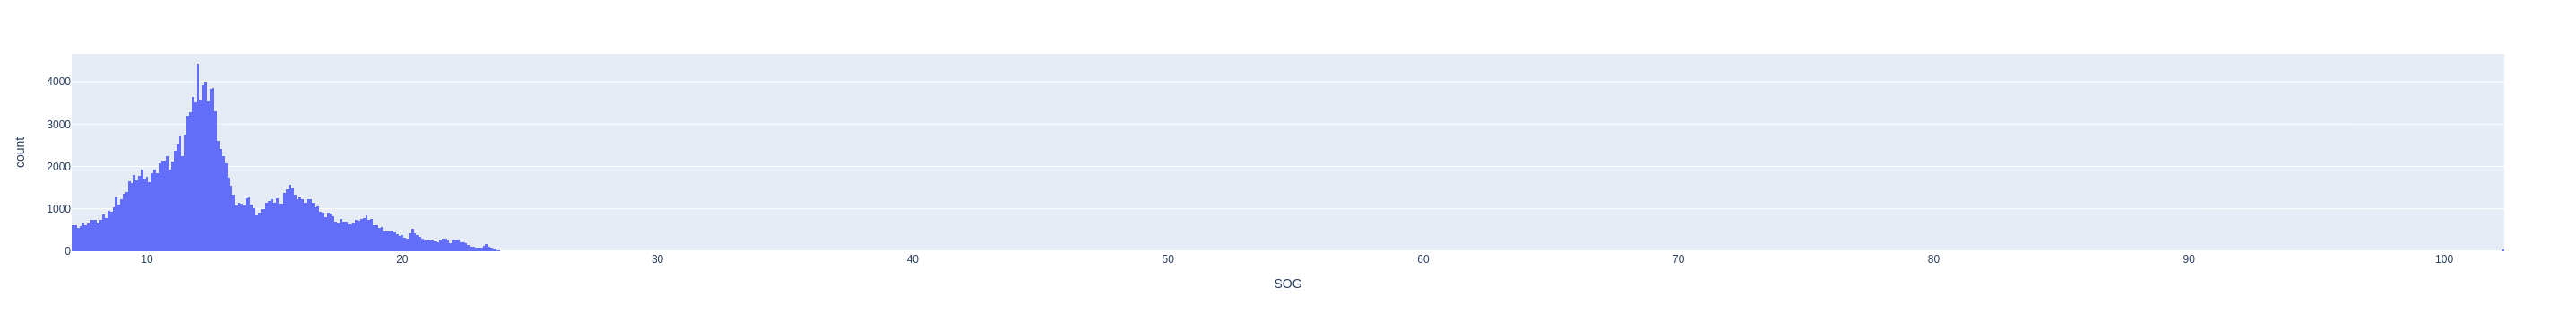

In [93]:
import plotly.express as px
fig = px.histogram(df['SOG'], x="SOG")
fig.show()

In [94]:
import numpy as np
data = df['SOG']
mean = np.mean(data)
std = np.std(data)
threshold = 5
outlier = [abs((i-mean)/std) >= threshold for i in data]
df['is_outlier'] = outlier

<Axes: xlabel='index', ylabel='SOG'>

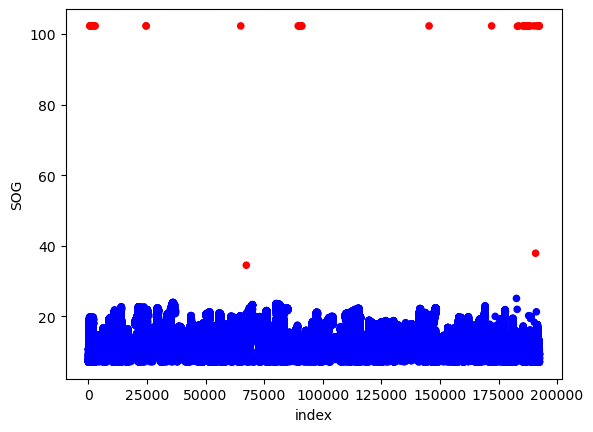

In [95]:
df.reset_index().plot(x='index', y='SOG', kind='scatter', c=df['is_outlier'], cmap='bwr',colorbar=False)

In [96]:
df=df[df['is_outlier']==False]

In [97]:
import pandas as pd
year = 2022
df = df
print(len(df))
df_export=df.copy()
# calculate relative windwave direction
df["COG_true"] = df["COG"]
df.loc[df["COG_true"] < 0, "COG_true"] = 360 + df["COG_true"]
df["rel_dir"] = abs(df["COG_true"] - df["VMDR_WW"])
df["dir_4"] = 2
df.loc[((df["rel_dir"] < 45) | (df["rel_dir"] > 315)), "dir_4"] = 1
df.loc[((df["rel_dir"] > 135) & (df["rel_dir"] < 225)) , "dir_4"] = 3

# calculate resistance of ship with simple approach
df["resist"] = df["Length"] * df["Width"] * df["Draft"]

# subset dataframe
df= df[['SOG', 'IMO', 'resist', 'Length', 'Width', 'Draft', 'COG', 'Heading', 
        'VHM0_WW', 'VMDR_SW2', 'VMDR_SW1','VMDR',  'VTM10', 'VTPK','VPED',
        'VTM02','VMDR_WW','VTM01_SW2','VHM0_SW1','VTM01_SW1','VSDX','VSDY',
        'VHM0','VTM01_WW','VHM0_SW2'] 
       + ['thetao', 'so', 'uo', 'vo', 'zos', 'mlotst',
       'bottomT']
       + ["rel_dir", "COG_true", "dir_4"]]
# df = df[subset]

# drop NAs and calculate correlation
df = df.dropna()
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

192390


/tmp/ipykernel_3158/4121389361.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_3158/4121389361.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_3158/4121389361.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_315

/tmp/ipykernel_3158/2793700089.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



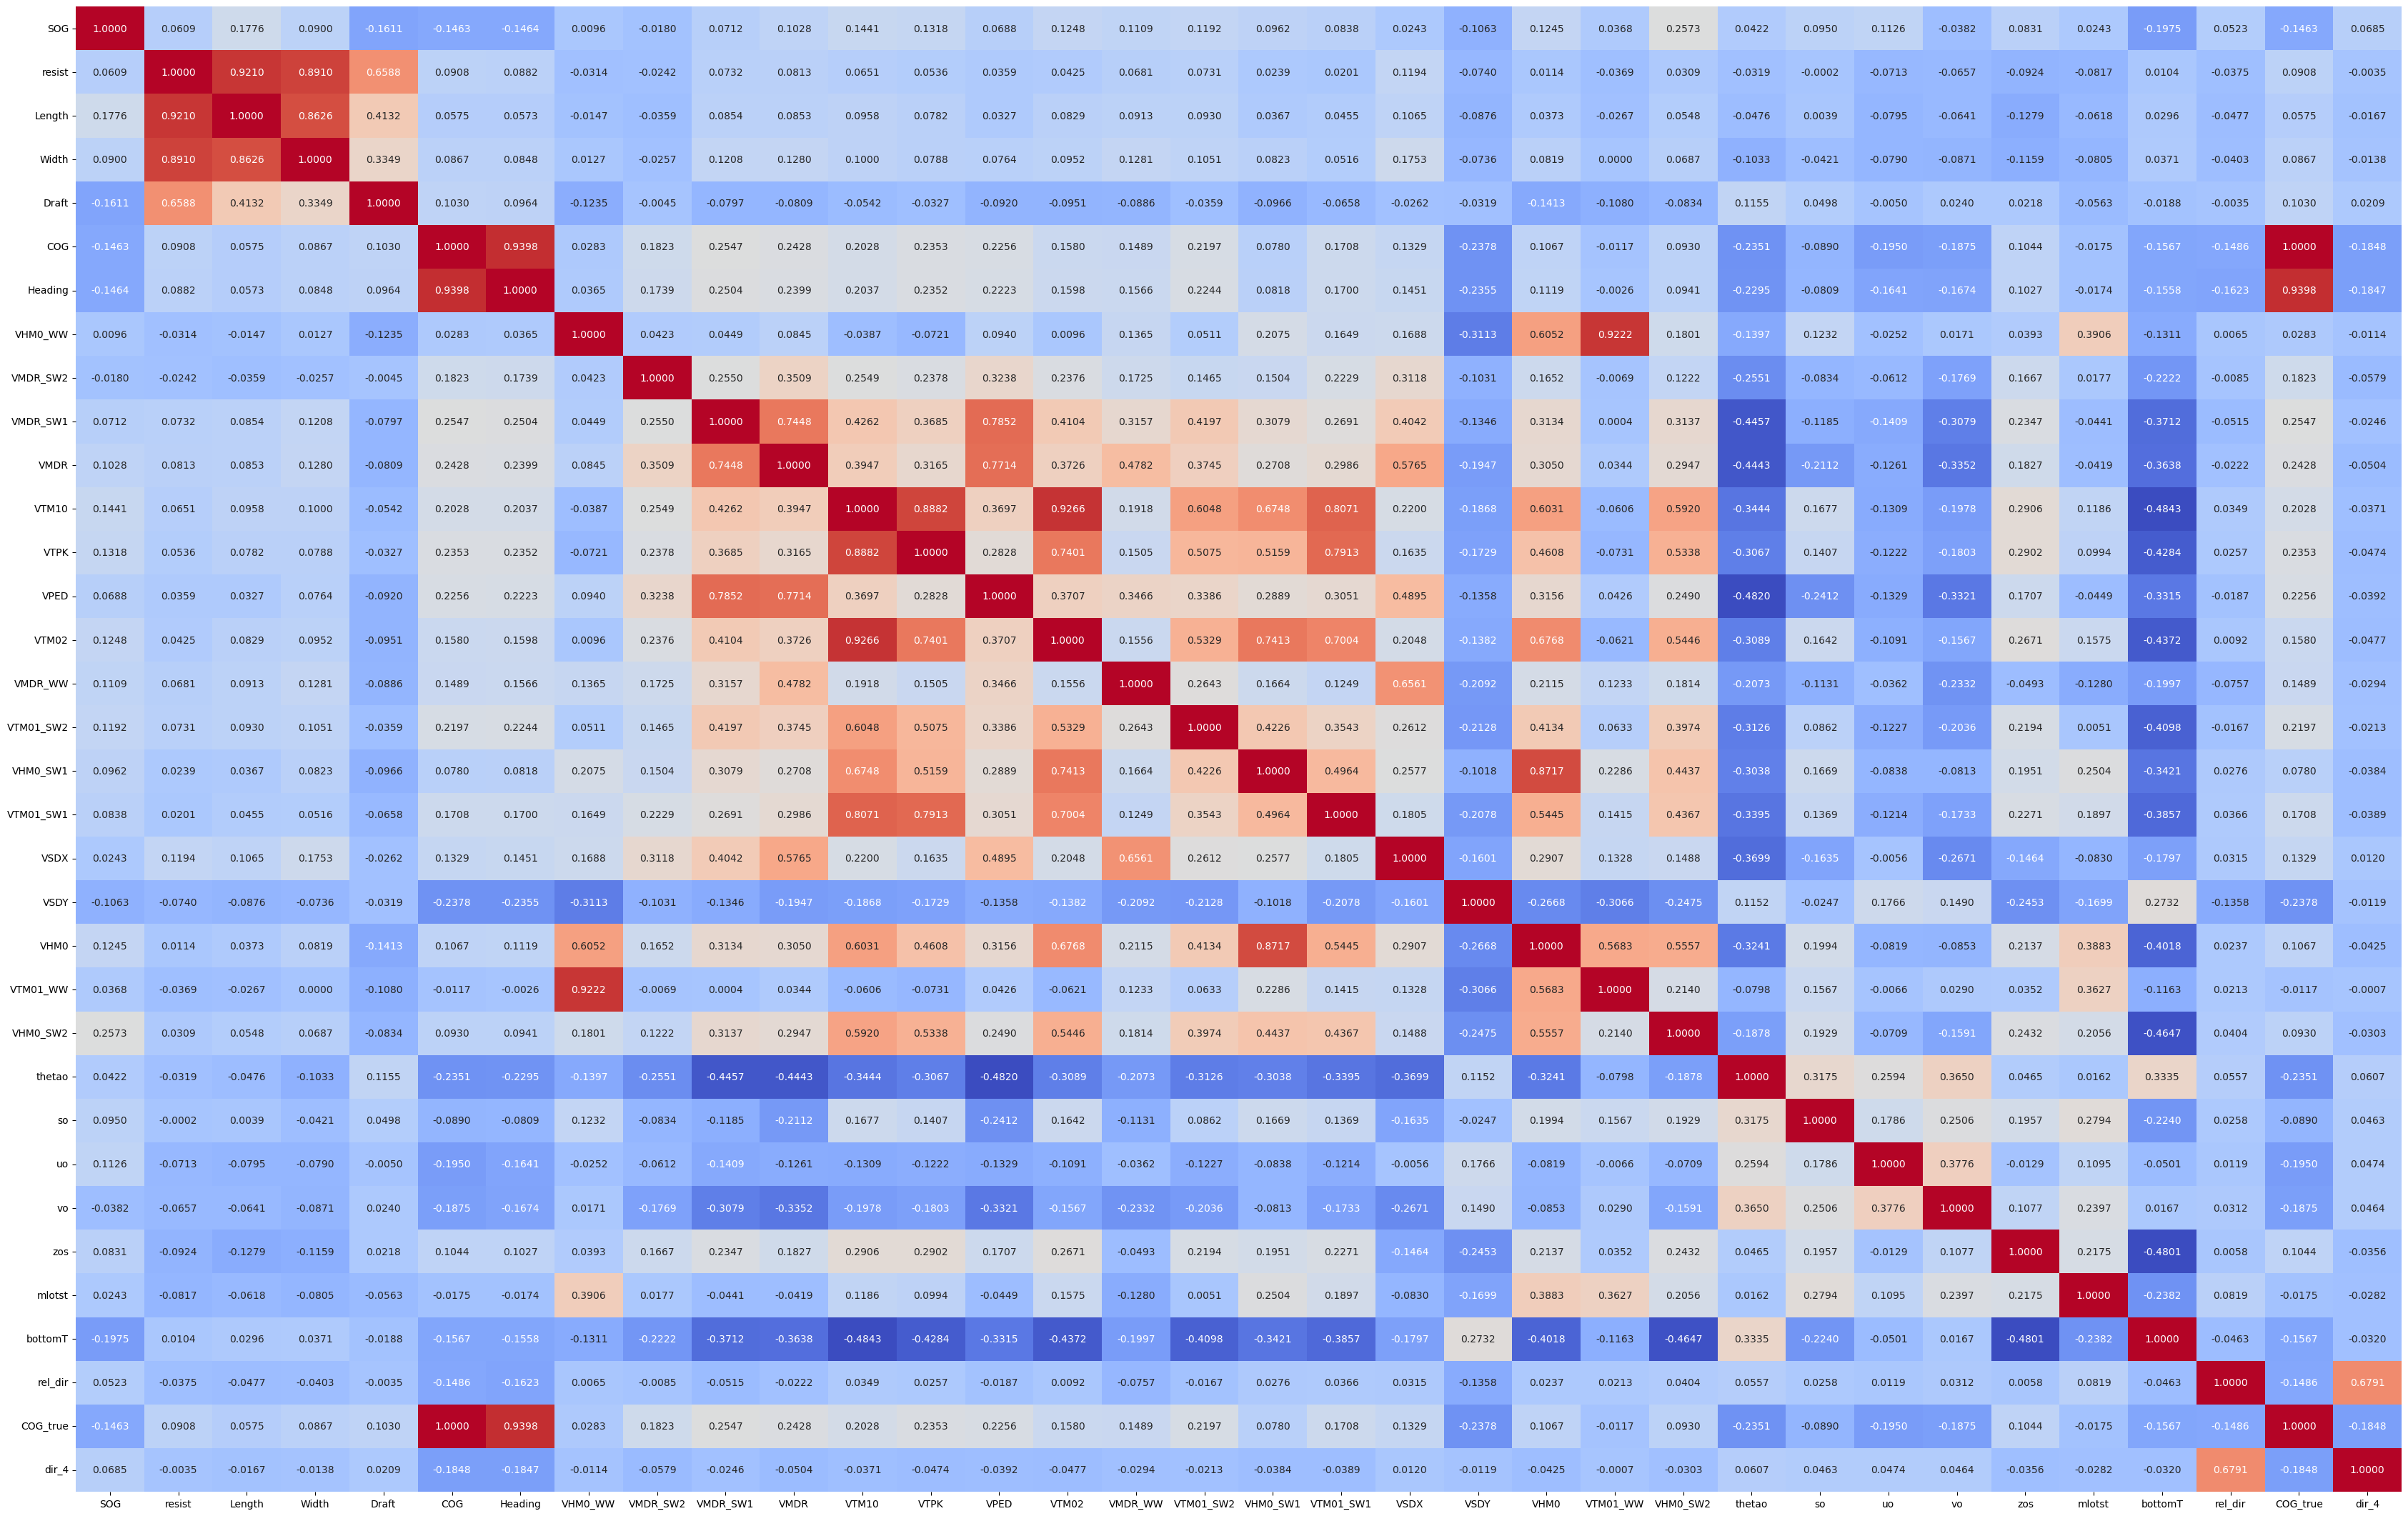

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(42, 27))
sns.heatmap(df.corr(), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation='horizontal')
plt.savefig('./correlation.png', bbox_inches='tight', pad_inches=0.0)

In [102]:
df

SOG         IMO    resist  Length  Width  Draft    COG  Heading  \
273     15.9  IMO9283203  131648.0   272.0   40.0   12.1  128.2    126.0   
282     15.2  IMO9283203  131648.0   272.0   40.0   12.1   83.7     84.0   
283     16.3  IMO9283203  131648.0   272.0   40.0   12.1  136.6    138.0   
284     17.8  IMO9283203  131648.0   272.0   40.0   12.1   86.2     86.0   
288     17.4  IMO9283203  131648.0   272.0   40.0   12.1   86.6     86.0   
...      ...         ...       ...     ...    ...    ...    ...      ...   
191817  15.8  IMO9213454   63680.0   199.0   32.0   10.0  335.1    337.0   
191818  15.1  IMO9213454   63680.0   199.0   32.0   10.0  336.5    335.0   
191819  15.7  IMO9213454   63680.0   199.0   32.0   10.0  334.1    335.0   
191820  15.1  IMO9213454   63680.0   199.0   32.0   10.0  343.0    340.0   
191821  15.0  IMO9213454   63680.0   199.0   32.0   10.0  336.9    334.0   

         VHM0_WW    VMDR_SW2  ...     thetao         so        uo        vo  \
273     0.206667  141.040009  ...  15.674554  28.430107  0.007280 -0.006407   
282     0.200000  125.309998  ...  15.674554  28.430107  0.007280 -0.006407   
283     0.206667  141.040009  ...  15.674554  28.430107  0.007280 -0.006407   
284     0.200000  125.309998  ...  15.674554  28.430107  0.007280 -0.006407   
288     0.200000  125.309998  ...  15.674554  28.430107  0.007280 -0.006407   
...          ...         ...  ...        ...        ...       ...       ...   
191817  0.000000   99.043335  ...   7.033753  28.485470  0.021973 -0.002645   
191818  0.123333  198.986664  ...   7.199286  28.640095  0.010987  0.020142   
191819  0.123333  198.986664  ...   7.199286  28.640095  0.010987  0.020142   
191820  0.123333  198.986664  ...   7.199286  28.640095  0.010987  0.020142   
191821  0.123333  198.986664  ...   7.199286  28.640095  0.010987  0.020142   

             zos     mlotst    bottomT     rel_dir  COG_true  dir_4  
273    -0.312420   7.065513  15.663486  126.533337     128.2      2  
282    -0.312420   7.065513  15.663486  184.289990      83.7      3  
283    -0.312420   7.065513  15.663486  118.133337     136.6      2  
284    -0.312420   7.065513  15.663486  181.789990      86.2      3  
288    -0.312420   7.065513  15.663486  181.389990      86.6      3  
...          ...        ...        ...         ...       ...    ...  
191817  0.268563  10.528887   7.510331  313.916660     335.1      2  
191818  0.291147  10.528887   7.533281  215.943336     336.5      3  
191819  0.291147  10.528887   7.533281  213.543336     334.1      3  
191820  0.291147  10.528887   7.533281  222.443336     343.0      3  
191821  0.291147  10.528887   7.533281  216.343336     336.9      3  

[150169 rows x 35 columns]

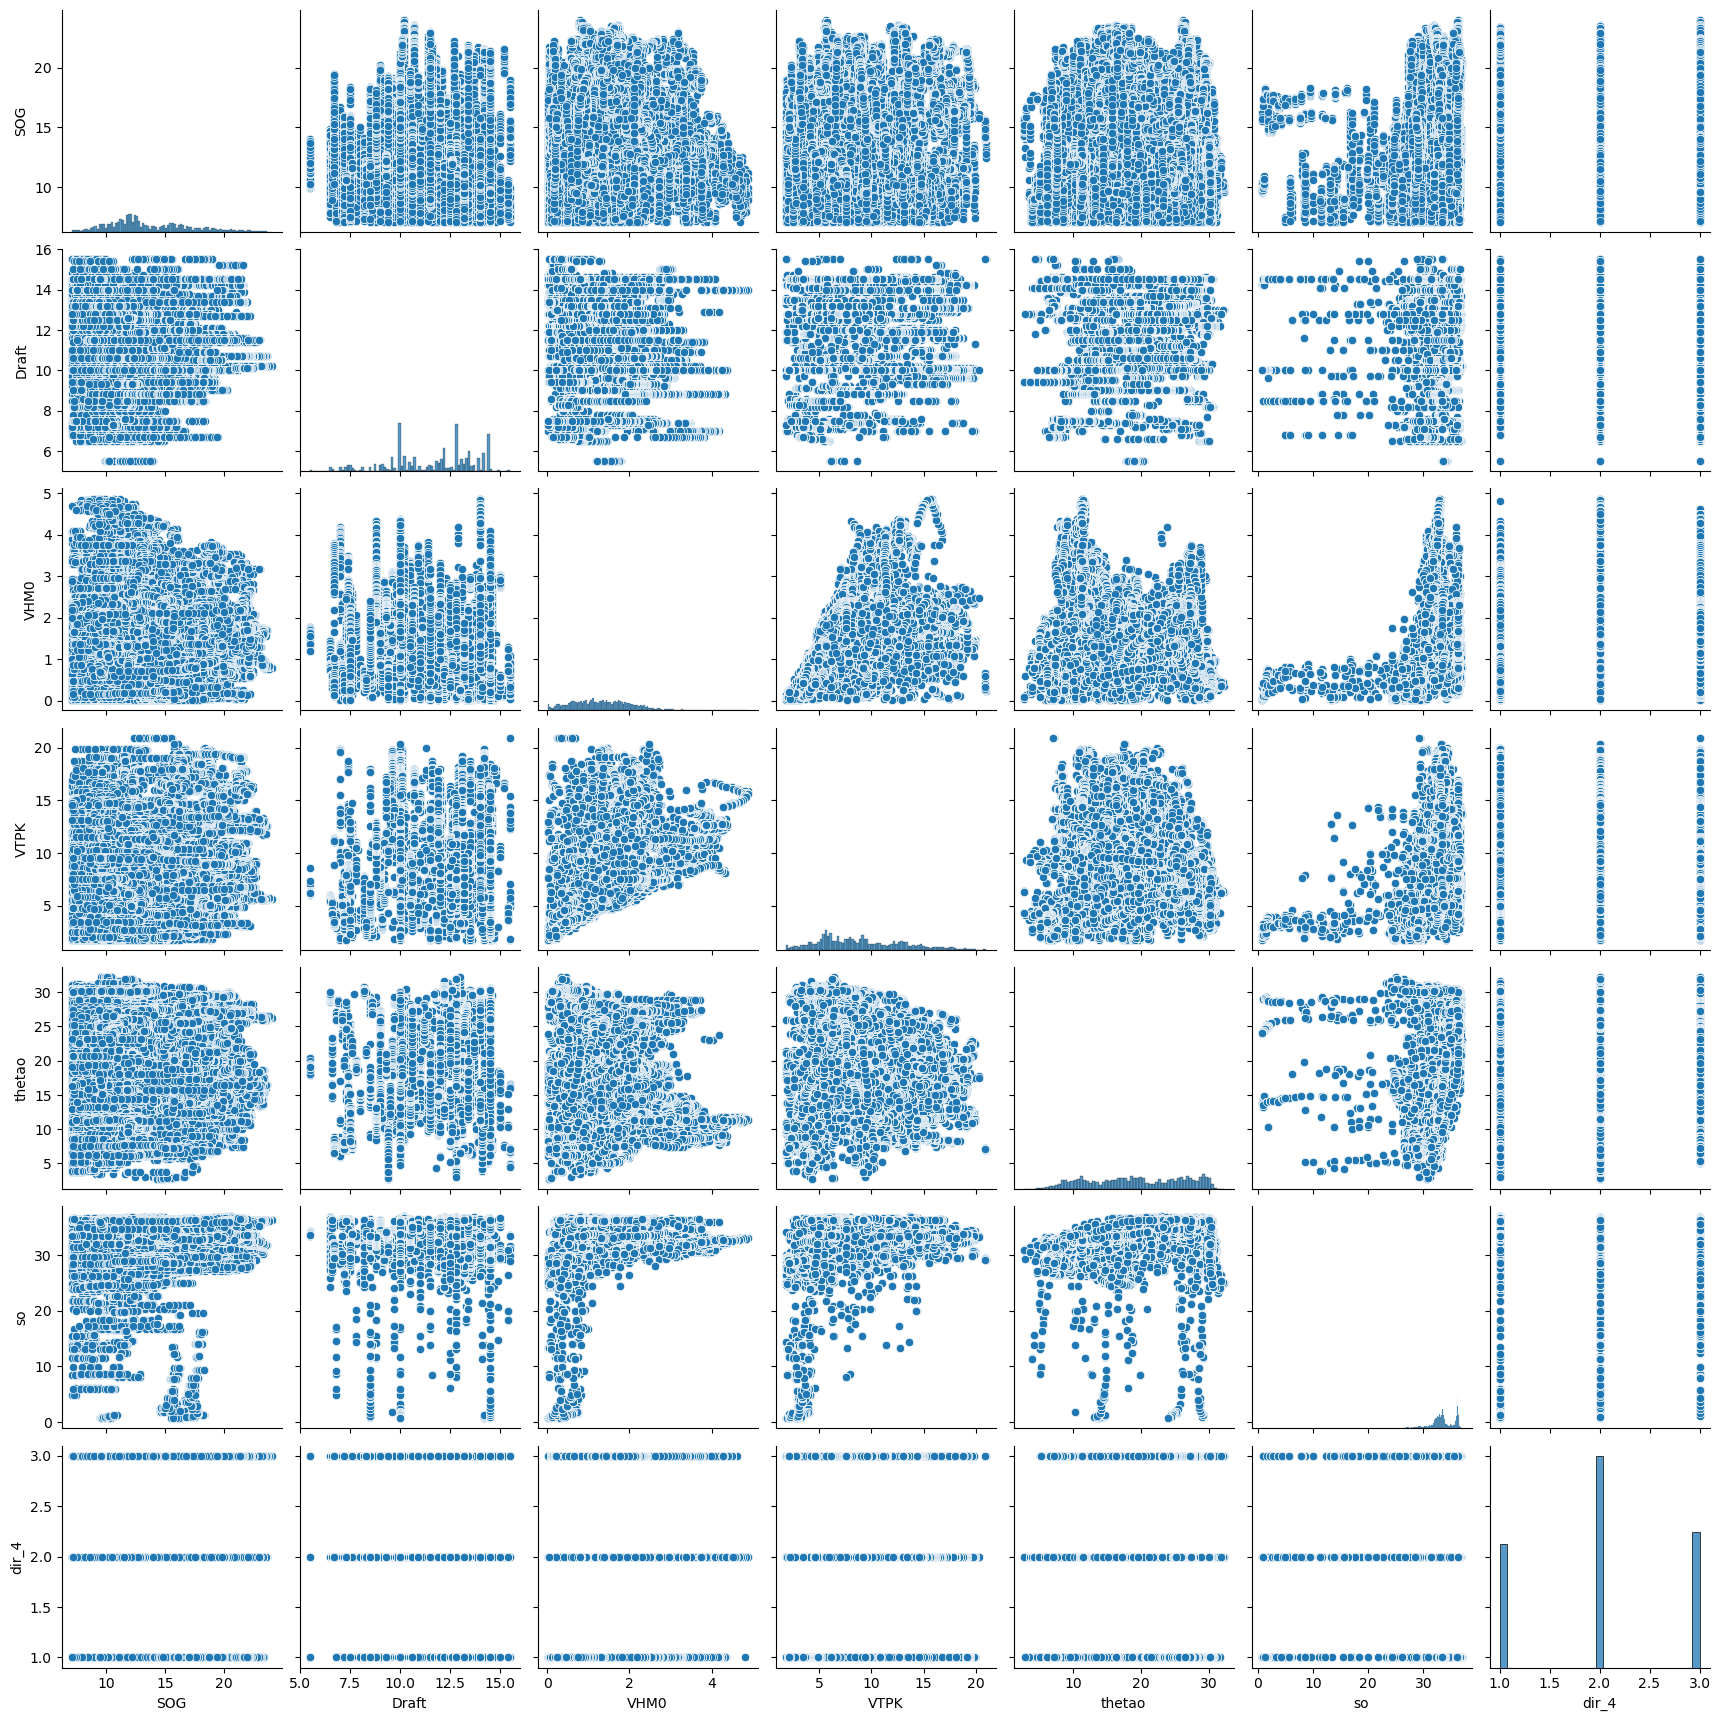

In [103]:
import seaborn as sns
subset = ["SOG", "Draft", "VHM0", "VTPK", "thetao", "so", "dir_4"]
sns.pairplot(df[subset])

In [104]:
subset=['resist','Draft',
        'VHM0_WW', 'VMDR_SW2', 'VMDR_SW1', 'VTM10','VMDR_WW','VTM01_SW2','VHM0_SW1','VSDX','VSDY',
        'VHM0','VHM0_SW2','thetao', 'so', 'uo', 'vo', 'zos', 'mlotst','bottomT',"rel_dir", "COG_true", "dir_4"]

In [105]:
X = df[subset].copy()
y = df["SOG"].copy()

In [106]:
X.describe()


resist          Draft        VHM0_WW       VMDR_SW2  \
count  150169.000000  150169.000000  150169.000000  150169.000000   
mean    96252.505995      11.604352       0.559739     181.153463   
std     46736.308119       2.117462       0.600067      82.697181   
min     33088.000000       5.500000       0.000000       0.130005   
25%     63680.000000      10.000000       0.130000     123.893341   
50%     79360.000000      12.100000       0.376667     186.653336   
75%    103219.200000      13.300000       0.800000     236.436676   
max    272304.000000      15.500000       3.940000     359.649994   

            VMDR_SW1          VTM10        VMDR_WW      VTM01_SW2  \
count  150169.000000  150169.000000  150169.000000  150169.000000   
mean      194.652994       7.473675     202.195649       7.962601   
std        97.450171       2.675543     108.376951       4.027449   
min         0.020004       1.610000       0.020004       0.840000   
25%       118.266670       5.390000     111.410004       4.720000   
50%       185.500000       7.350000     213.429993       7.040000   
75%       287.440002       9.463333     309.320007      11.236668   
max       359.909973      14.849999     359.979980      23.299999   

            VHM0_SW1           VSDX  ...         thetao             so  \
count  150169.000000  150169.000000  ...  150169.000000  150169.000000   
mean        1.005607       0.008072  ...      19.448534      32.766877   
std         0.700218       0.049257  ...       6.973504       3.941186   
min         0.010000      -0.210000  ...       2.740689       0.727407   
25%         0.530000      -0.020000  ...      13.457203      32.109112   
50%         0.873333       0.010000  ...      19.413839      33.238102   
75%         1.320000       0.040000  ...      25.845135      35.026081   
max         4.860000       0.180000  ...      32.182991      36.905716   

                  uo             vo            zos         mlotst  \
count  150169.000000  150169.000000  150169.000000  150169.000000   
mean        0.031541       0.067194       0.028525      20.110525   
std         0.215428       0.339958       0.269392      13.010514   
min        -0.844142      -1.519128      -0.764345       5.845199   
25%        -0.070625      -0.096020      -0.093255      10.737730   
50%         0.005994      -0.004941       0.079924      15.207407   
75%         0.078569       0.085527       0.215105      24.772829   
max         1.638641       1.790849       0.808989     119.757385   

             bottomT        rel_dir       COG_true          dir_4  
count  150169.000000  150169.000000  150169.000000  150169.000000  
mean        8.276924     113.802203     182.425929       2.025192  
std         7.798501      80.661124     103.209813       0.741949  
min         1.007800       0.003333       0.000000       1.000000  
25%         1.417074      44.453342     105.600000       1.000000  
50%         6.514246     100.669989     175.700000       2.000000  
75%        11.653375     175.729980     286.700000       3.000000  
max        32.174564     358.439999     360.000000       3.000000  

[8 rows x 23 columns]

In [107]:
y.describe()

count    150169.000000
mean         13.658194
std           3.433109
min           7.100000
25%          11.300000
50%          12.700000
75%          16.000000
max          24.000000
Name: SOG, dtype: float64

In [108]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

### DECISION TREE REGRESSOR

In [109]:
# Build DT model and finetune
set_config(print_changed_only=False) 
dt = DecisionTreeRegressor(criterion = "friedman_mse")#, max_depth=10)
print(dt)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=None, splitter='best')


mean cross validation score: 0.9807169162604341
score without cv: 0.9927792030622471
Elapsed time in seconds:  14.27099252500011

Elapsed time in seconds:  1.6041993870003353
R2:  0.9812984087159581

Draft 0.26589709544153234
resist 0.19425517384771404
bottomT 0.12893445635121328
so 0.0679618153924068
zos 0.040243727966353816
VTM10 0.039919060729490086
COG_true 0.029738498936111888
VMDR_SW1 0.028169434433115023
rel_dir 0.020092204039236283
VHM0 0.018429058781331765
VHM0_WW 0.017788951810321654
VMDR_WW 0.017766042855279583
vo 0.016887313850993454
thetao 0.015897957600359794
VSDX 0.015266605342688717
VHM0_SW1 0.01422646102810227
mlotst 0.013458922303437988
VHM0_SW2 0.013037283394538508
VMDR_SW2 0.011815795444571392
VSDY 0.01171701626336314
uo 0.010917339652212754
VTM01_SW2 0.006460372032899719
dir_4 0.001119412502725501


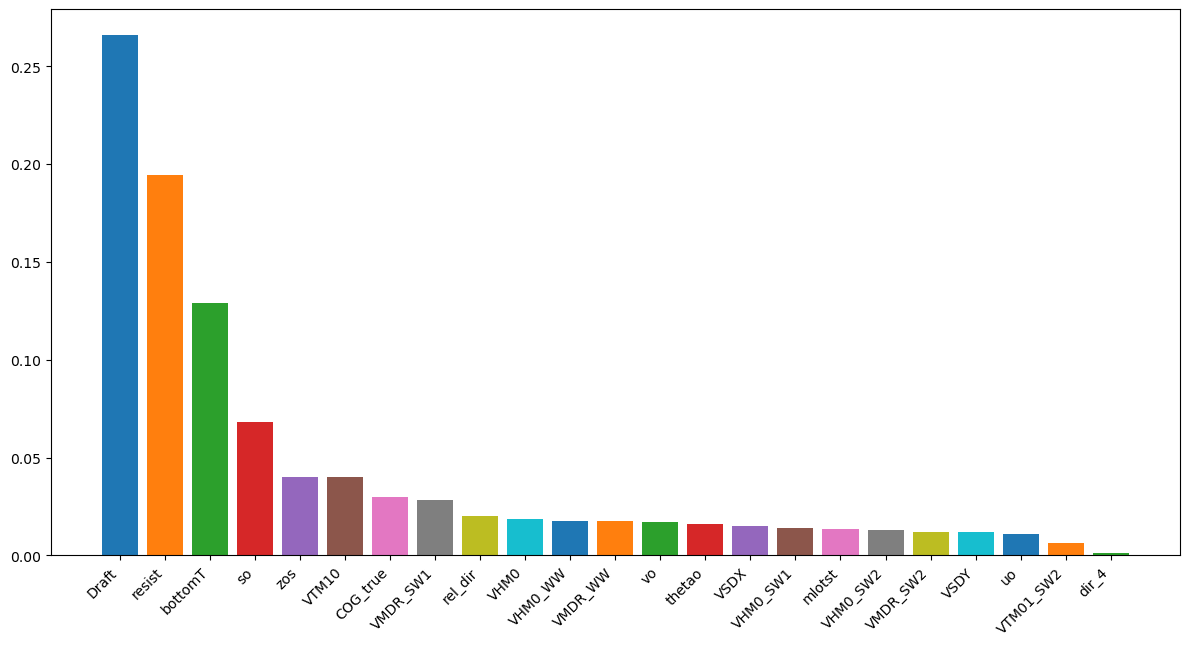

Elapsed time in seconds:  0.030131713999708154


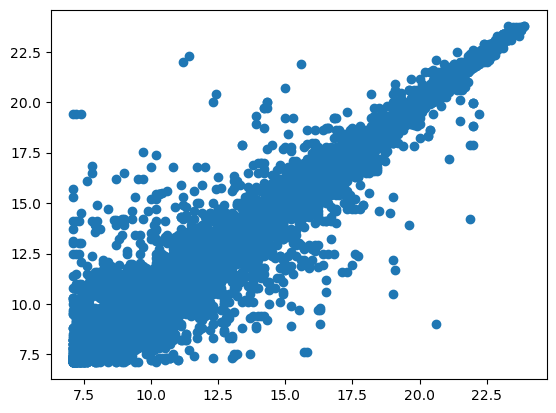

In [110]:
# Train DT model


t_start = process_time()
dt_scores = cross_val_score(model_dt, X_train, y_train, cv = 10)
t_stop = process_time()
print("mean cross validation score: {}".format(np.mean(dt_scores)))
print("score without cv: {}".format(model_dt.score(X_train, y_train)))
time_dt = t_stop-t_start
print("Elapsed time in seconds: ", time_dt)

print("")
t_start = process_time()
model_dt = dt.fit(X_train, y_train)
t_stop = process_time()

time_dt = t_stop-t_start
print("Elapsed time in seconds: ", time_dt)

r2_dt = model_dt.score(X_test, y_test)
print("R2: ", r2_dt)

print("")
plt.figure(figsize=(12,6))
# importance of independent variables for decision tree regression model
for importance, name in sorted(zip(dt.feature_importances_, X_train.columns),reverse=True):
 print (name, importance)
 plt.bar(name, importance, align='center')

plt.tight_layout()
ax = plt.gca() # Obtiene el objeto ax actual
ax.set_xticks(X_train.columns) # Establece las posiciones de los xticks
ax.set_xticklabels(X_train.columns, rotation=45, ha='right') # Establece las etiquetas de los xticks y las rota 45 grados
plt.show()

t_start = process_time()
y_pred = model_dt.predict(X_test)
time_dt = process_time()-t_start
print("Elapsed time in seconds: ", time_dt)
plt.scatter(y_test, y_pred)

In [112]:
pd.DataFrame(dt_scores).describe()

0
count  10.000000
mean    0.980717
std     0.001473
min     0.978152
25%     0.980414
50%     0.980874
75%     0.981897
max     0.982267

In [113]:
# Evaluate
y_pred = model_dt.predict(X_test)
print("R Squared Score is:", metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R Squared Score is: 0.9812984087159581
Mean Absolute Error: 0.17578311570867935
Mean Squared Error: 0.222045099359581
Root Mean Squared Error: 0.47121661617517374


In [114]:
from joblib import dump, load

In [115]:
dump(model_dt,'./DTR_model.joblib')

['./DTR_model.joblib']

### LINERA REGRESSOR

In [116]:
# Build LR model and finetune
set_config(print_changed_only=False) 
lr = LinearRegression()
print(lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, positive=False)


mean cross validation score: 0.21995796519741256
score without cv: 0.22035356620773772
Elapsed time in seconds:  3.2360077449998244

Elapsed time in seconds:  0.283814361000168
R2:  0.2212024283680568

uo 1.9374865904522443
VHM0_SW2 1.4967409323849235
VHM0 1.2452985720757572
dir_4 0.23581260546254942
thetao 0.06351308461654076
VTM01_SW2 0.017753306515366316
VMDR_WW 0.0020840343007576534
resist 2.3202215856107324e-05
VMDR_SW2 -0.0001269931326715601
VMDR_SW1 -0.0005560870126029016
rel_dir -0.0006419673940207121
COG_true -0.005069160696821062
so -0.005560830689112745
mlotst -0.008103562611770788
bottomT -0.08483733593303955
zos -0.08600946576479432
VTM10 -0.10064960816808172
Draft -0.5820242017800389
VHM0_SW1 -0.863649258558385
vo -0.9503200911270903
VHM0_WW -1.194970651258267
VSDY -4.871996092390536
VSDX -6.027666209835085


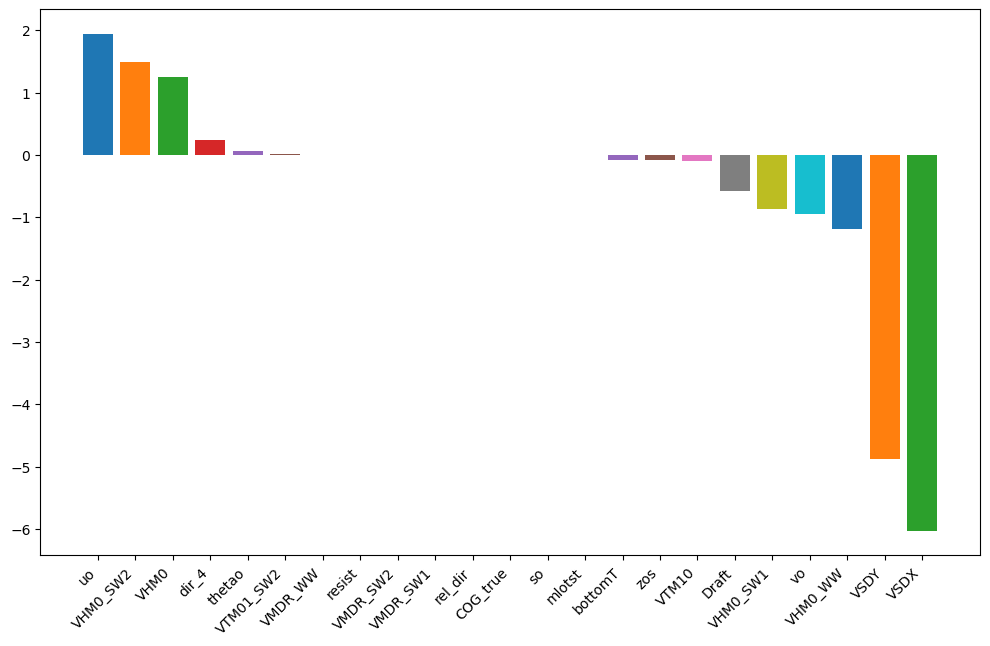

Elapsed time in seconds:  0.007489306000024953


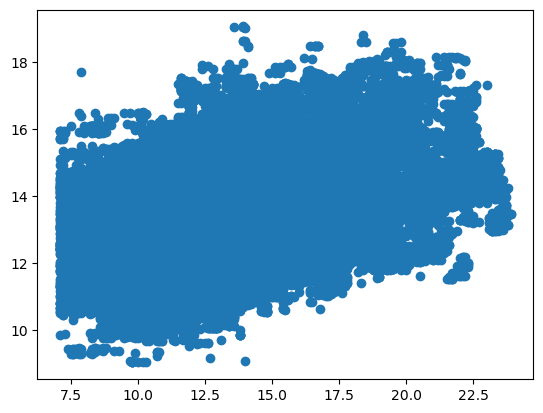

In [117]:
# Train LR model


t_start = process_time()
lr_scores = cross_val_score(model_lr, X_train, y_train, cv = 10)
t_stop = process_time()
print("mean cross validation score: {}".format(np.mean(lr_scores)))
print("score without cv: {}".format(model_lr.score(X_train, y_train)))
time_lr = t_stop-t_start
print("Elapsed time in seconds: ", time_lr)
print("")
t_start = process_time()
model_lr = lr.fit(X_train, y_train)
t_stop = process_time()

time_lr = t_stop-t_start
print("Elapsed time in seconds: ", time_lr)

r2_lr= model_lr.score(X_test, y_test)
print("R2: ", r2_lr)
print("")
plt.figure(figsize=(10,6))
# importance of independent variables for linear regression model
for importance, name in sorted(zip(lr.coef_, X_train.columns),reverse=True):
 print (name, importance)
 plt.bar(name, importance)

plt.tight_layout()
ax = plt.gca() # Obtiene el objeto ax actual
ax.set_xticks(X_train.columns) # Establece las posiciones de los xticks
ax.set_xticklabels(X_train.columns, rotation=45, ha='right') # Establece las etiquetas de los xticks y las rota 45 grados
plt.show()


t_start = process_time()
y_pred = model_lr.predict(X_test)
time_lr = process_time()-t_start
print("Elapsed time in seconds: ", time_lr)
plt.scatter(y_test, y_pred)

In [118]:
pd.DataFrame(lr_scores).describe()

0
count  10.000000
mean    0.219958
std     0.007498
min     0.211434
25%     0.214191
50%     0.217965
75%     0.224337
max     0.232312

In [119]:
# Evaluate
y_pred = model_lr.predict(X_test)
print("R Squared Score is:", metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R Squared Score is: 0.2212024283680568
Mean Absolute Error: 2.358875940321146
Mean Squared Error: 9.24670962740882
Root Mean Squared Error: 3.040840283113998


In [120]:
dump(model_lr,'./LR_model.joblib')

['./LR_model.joblib']

### Extra Tree Regressor

In [121]:
# Build ETR model and finetune
set_config(print_changed_only=False) 
ext =ExtraTreesRegressor(criterion = "friedman_mse")#, max_depth=10)
print(ext)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='friedman_mse',
                    max_depth=None, max_features=1.0, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)


mean cross validation score: 0.9866279246067743
score without cv: 0.9944950092284579
Elapsed time in seconds:  443.214021579

Elapsed time in seconds:  43.85262892499986
R2:  0.9867322447022866

Draft 0.22646483416071364
resist 0.1348662011140356
bottomT 0.07879974250434388
COG_true 0.06796606014318134
thetao 0.046457419719104755
so 0.038104112720027214
VHM0_SW2 0.0365891378332534
VHM0 0.03552086623188561
VTM10 0.03364052260726984
zos 0.02957974803263506
VSDY 0.029238597496545535
VMDR_WW 0.028452883145417385
VHM0_SW1 0.024975168522036618
VMDR_SW1 0.024771465014187484
VSDX 0.024352053540085173
VHM0_WW 0.023203027792758138
vo 0.021185278151119275
rel_dir 0.019867743251539845
dir_4 0.018044892360859703
VTM01_SW2 0.016195485454295198
uo 0.014411292263107224
mlotst 0.014218570241318262
VMDR_SW2 0.01309489770027989


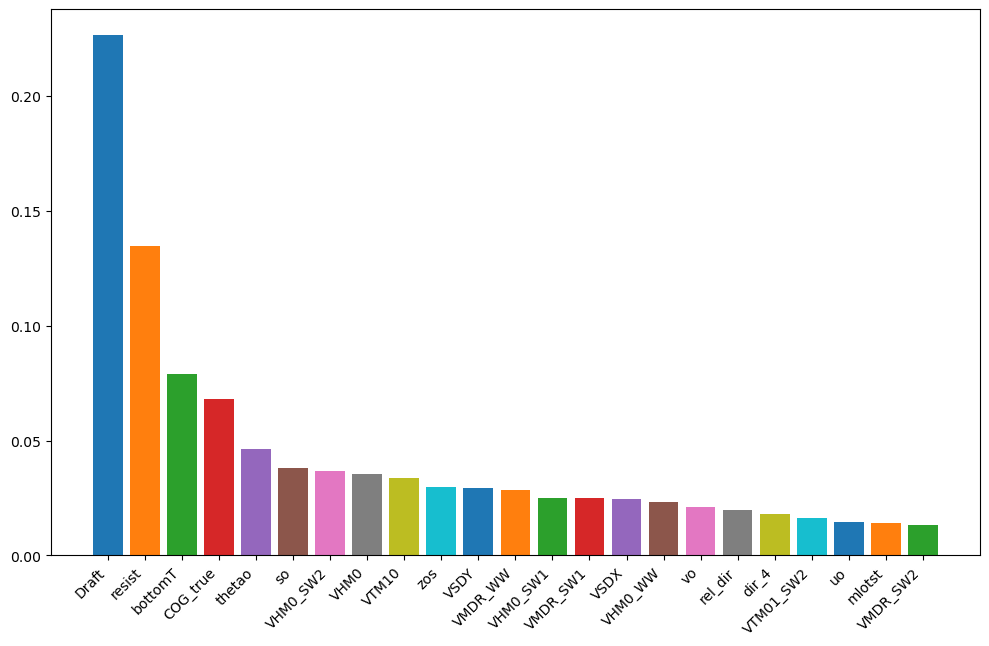

Elapsed time in seconds:  2.8832737719999386


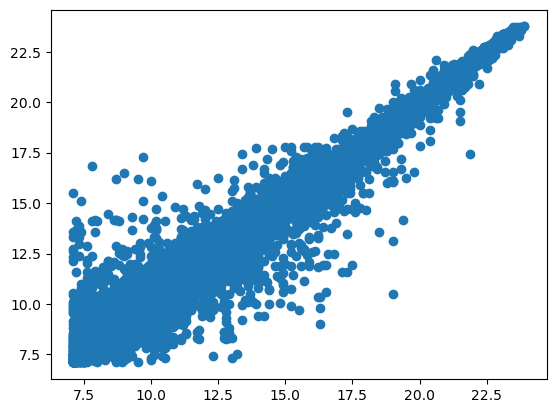

In [122]:
# Train ETR model


t_start = process_time()
ext_scores = cross_val_score(model_ext, X_train, y_train, cv = 10)
t_stop = process_time()
print("mean cross validation score: {}".format(np.mean(ext_scores)))
print("score without cv: {}".format(model_ext.score(X_train, y_train)))
time_ext = t_stop-t_start
print("Elapsed time in seconds: ", time_ext)
print("")
t_start = process_time()
model_ext= ext.fit(X_train, y_train)
t_stop = process_time()

time_ext = t_stop-t_start
print("Elapsed time in seconds: ", time_ext)

r2_ext = model_ext.score(X_test, y_test)
print("R2: ", r2_ext)

print("")
plt.figure(figsize=(10,6))
# importance of independent variables for extra tree regression model
for importance, name in sorted(zip(ext.feature_importances_, X_train.columns),reverse=True):
 print (name, importance)
 plt.bar(name, importance)

plt.tight_layout()
ax = plt.gca() # Obtiene el objeto ax actual
ax.set_xticks(X_train.columns) # Establece las posiciones de los xticks
ax.set_xticklabels(X_train.columns, rotation=45, ha='right') # Establece las etiquetas de los xticks y las rota 45 grados
plt.show()


t_start = process_time()
y_pred = model_ext.predict(X_test)
time_ext = process_time()-t_start
print("Elapsed time in seconds: ", time_ext)
plt.scatter(y_test, y_pred)

In [123]:
pd.DataFrame(ext_scores).describe()

0
count  10.000000
mean    0.986628
std     0.000958
min     0.985429
25%     0.985917
50%     0.986184
75%     0.987436
max     0.988268

In [124]:
# Evaluate
y_pred = model_ext.predict(X_test)
print("R Squared Score is:", metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R Squared Score is: 0.9867322447022866
Mean Absolute Error: 0.15966853753364402
Mean Squared Error: 0.1575288433275316
Root Mean Squared Error: 0.3968990341730899


In [125]:
dump(model_ext,'./EXT_model.joblib')

['./EXT_model.joblib']

### Random Forest Regressor

In [126]:
# Build RFR model and finetune
set_config(print_changed_only=False) 
rfr =RandomForestRegressor(criterion = "friedman_mse")#, max_depth=10)
print(rfr)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='friedman_mse',
                      max_depth=None, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


mean cross validation score: 0.9864535031653491
score without cv: 0.9937447341115955
Elapsed time in seconds:  992.578187784

Elapsed time in seconds:  108.6404908909999
R2:  0.9867516620526945

Draft 0.2657605118313231
resist 0.18337331108533225
bottomT 0.12635686570473784
so 0.06445683489108388
COG_true 0.04172012557996973
VTM10 0.03709803596185068
zos 0.032887141748039174
VMDR_SW1 0.028183097720555838
VMDR_WW 0.02050980606909193
VSDY 0.019344555790038305
VHM0 0.01770657756148318
thetao 0.017227205576977322
VHM0_SW2 0.016546566570043126
rel_dir 0.016484653259913967
VHM0_WW 0.0157752416364349
vo 0.014977834325542061
VSDX 0.014911429703039783
VHM0_SW1 0.014567062393107328
VMDR_SW2 0.014021384143038766
mlotst 0.013955551499876897
uo 0.011149591020359062
VTM01_SW2 0.010975492523416595
dir_4 0.0020111234047442096


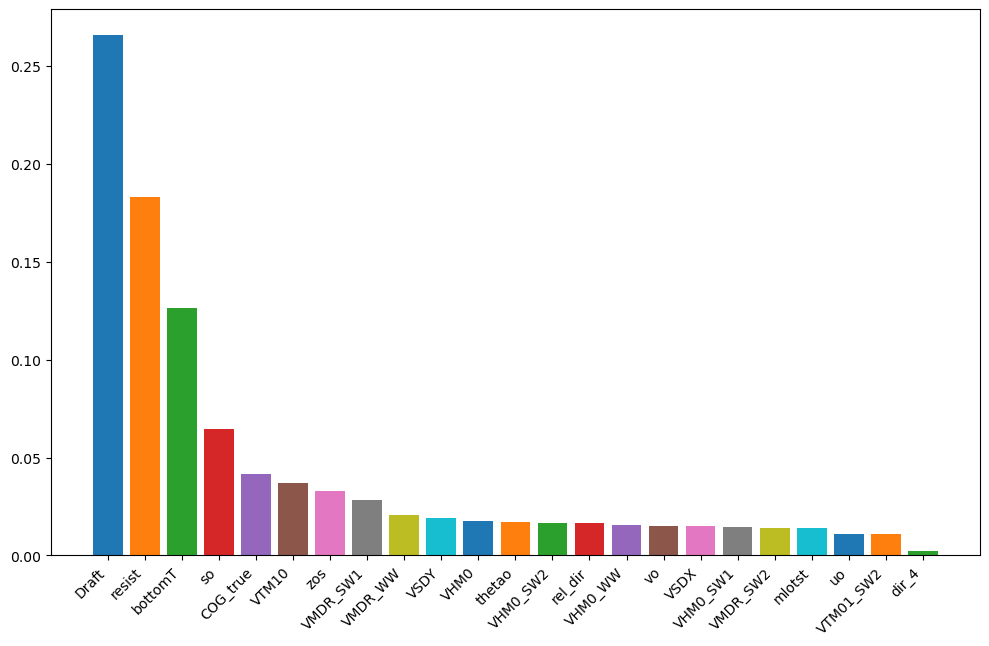

Elapsed time in seconds:  2.3883724309998797


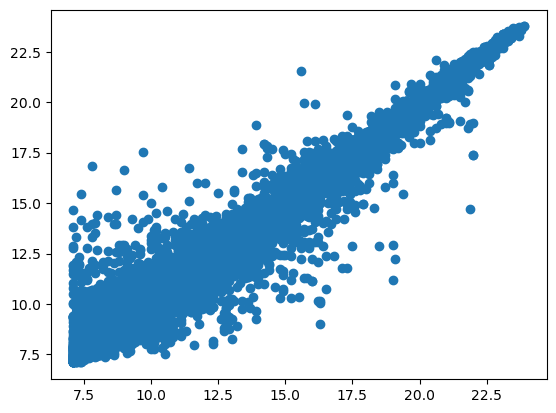

In [127]:
# Train RFR model


t_start = process_time()
rfr_scores = cross_val_score(model_rfr, X_train, y_train, cv = 10)
t_stop = process_time()
print("mean cross validation score: {}".format(np.mean(rfr_scores)))
print("score without cv: {}".format(model_rfr.score(X_train, y_train)))
time_rfr = t_stop-t_start
print("Elapsed time in seconds: ", time_rfr)
print("")
t_start = process_time()
model_rfr= rfr.fit(X_train, y_train)
t_stop = process_time()

time_rfr = t_stop-t_start
print("Elapsed time in seconds: ", time_rfr)

r2_rfr = model_rfr.score(X_test, y_test)
print("R2: ", r2_rfr)

print("")
plt.figure(figsize=(10,6))
# importance of independent variables for random forest regression model
for importance, name in sorted(zip(rfr.feature_importances_, X_train.columns),reverse=True):
 print (name, importance)
 plt.bar(name, importance)

plt.tight_layout()
ax = plt.gca() # Obtiene el objeto ax actual
ax.set_xticks(X_train.columns) # Establece las posiciones de los xticks
ax.set_xticklabels(X_train.columns, rotation=45, ha='right') # Establece las etiquetas de los xticks y las rota 45 grados
plt.show()

t_start = process_time()
y_pred = model_rfr.predict(X_test)
time_rfr = process_time()-t_start
print("Elapsed time in seconds: ", time_rfr)
plt.scatter(y_test, y_pred)

In [128]:
pd.DataFrame(rfr_scores).describe()

0
count  10.000000
mean    0.986454
std     0.000998
min     0.984892
25%     0.985722
50%     0.986259
75%     0.987252
max     0.988044

In [129]:
# Evaluate
y_pred = model_rfr.predict(X_test)
print("R Squared Score is:", metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R Squared Score is: 0.9867516620526945
Mean Absolute Error: 0.16290677469737563
Mean Squared Error: 0.15729829997776407
Root Mean Squared Error: 0.3966084971073667


In [130]:
dump(model_rfr,'./RFR_model.joblib')

['./RFR_model.joblib']

In [79]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 7.0 MB/s eta 0:00:00m eta 0:00:010:00:01


In [80]:
import xgboost as xgb

In [131]:
xgbr = xgb.XGBRegressor(verbosity=0) 
print(xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', predictor=None, ...)


mean cross validation score: 0.9613506238721825
score without cv: 0.9672731435319741
Elapsed time in seconds:  209.26976426599958

Elapsed time in seconds:  24.49050462499963
R2:  0.9625548829491287

Draft 0.38885835
bottomT 0.123133436
resist 0.11071872
so 0.046038598
COG_true 0.028962227
VTM10 0.02773743
vo 0.024103472
VSDX 0.023640143
zos 0.023111394
VSDY 0.021365339
VHM0 0.02129014
VHM0_SW2 0.019683255
thetao 0.019326493
VMDR_SW1 0.018021647
mlotst 0.01626598
VMDR_WW 0.015679475
VHM0_WW 0.01432609
VTM01_SW2 0.014270797
VHM0_SW1 0.013093679
dir_4 0.010500066
VMDR_SW2 0.008035839
uo 0.007727767
rel_dir 0.004109765


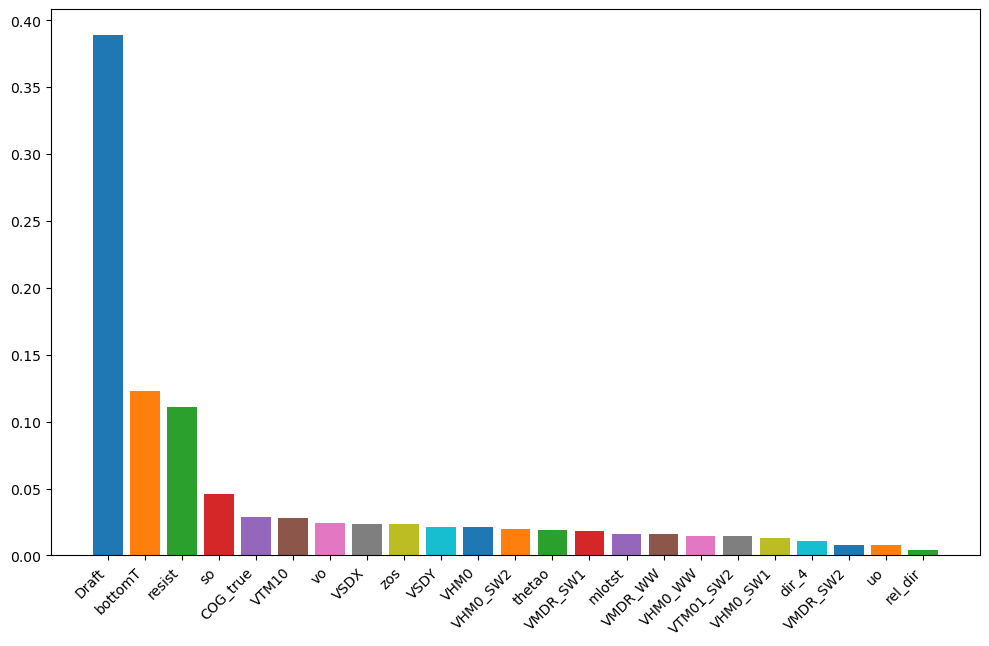

Elapsed time in seconds:  0.284951684000589


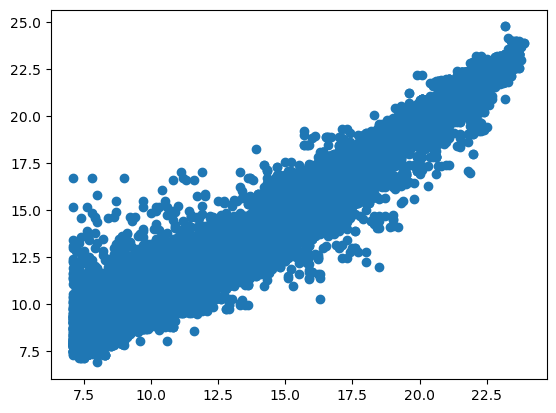

In [132]:
# Train XGBR model


t_start = process_time()
xgbr_scores = cross_val_score(model_xgbr, X_train, y_train, cv = 10)
t_stop = process_time()
print("mean cross validation score: {}".format(np.mean(xgbr_scores)))
print("score without cv: {}".format(model_xgbr.score(X_train, y_train)))
time_xgbr = t_stop-t_start
print("Elapsed time in seconds: ", time_xgbr)
print("")
t_start = process_time()
model_xgbr= xgbr.fit(X_train, y_train)
t_stop = process_time()

time_xgbr= t_stop-t_start
print("Elapsed time in seconds: ", time_xgbr)

r2_xgbr = model_xgbr.score(X_test, y_test)
print("R2: ", r2_xgbr)

print("")
plt.figure(figsize=(10,6))
# importance of independent variables for random forest regression model
for importance, name in sorted(zip(model_xgbr.feature_importances_, X_train.columns),reverse=True):
 print (name, importance)
 plt.bar(name, importance)

plt.tight_layout()
ax = plt.gca() # Obtiene el objeto ax actual
ax.set_xticks(X_train.columns) # Establece las posiciones de los xticks
ax.set_xticklabels(X_train.columns, rotation=45, ha='right') # Establece las etiquetas de los xticks y las rota 45 grados
plt.show()

t_start = process_time()
y_pred = model_xgbr.predict(X_test)
time_xgbr = process_time()-t_start
print("Elapsed time in seconds: ", time_xgbr)
plt.scatter(y_test, y_pred)

In [133]:
pd.DataFrame(xgbr_scores).describe()

0
count  10.000000
mean    0.961351
std     0.001341
min     0.959799
25%     0.960471
50%     0.961211
75%     0.961564
max     0.964080

In [134]:
# Evaluate
y_pred = model_xgbr.predict(X_test)
print("R Squared Score is:", metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R Squared Score is: 0.9625548829491287
Mean Absolute Error: 0.42072360953311755
Mean Squared Error: 0.44458808931337457
Root Mean Squared Error: 0.666774391614866


In [135]:
dump(model_xgbr,'./XGBR_model.joblib')

['./XGBR_model.joblib']